<a href="https://colab.research.google.com/github/aiyappa02/Technical-Analysis/blob/master/Technical_Analysis_Using_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Using RSI :The RSI provides technical traders signals about bullish and bearish price momentum, and it is often plotted beneath the graph of an asset's price.
#An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.
# for formula check out : https://www.investopedia.com/terms/r/rsi.asp

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
df=web.DataReader('RELIANCE.NS',data_source="yahoo",start='2019-07-24',end='2020-07-24')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-24,1278.800049,1253.550049,1273.500000,1259.099976,6943982.0,1247.546387
2019-07-25,1269.050049,1227.000000,1264.000000,1231.500000,9968545.0,1220.199707
2019-07-26,1242.500000,1210.000000,1231.500000,1213.800049,9320481.0,1202.662231
2019-07-29,1222.000000,1205.099976,1216.900024,1210.949951,8058035.0,1199.838257
2019-07-30,1220.000000,1175.949951,1213.949951,1180.900024,9533344.0,1170.064087
...,...,...,...,...,...,...
2020-07-20,1932.000000,1899.650024,1917.800049,1919.900024,16887635.0,1919.900024
2020-07-21,1977.000000,1936.500000,1939.000000,1971.550049,19463004.0,1971.550049
2020-07-22,2010.000000,1960.699951,1983.000000,2004.000000,27584518.0,2004.000000


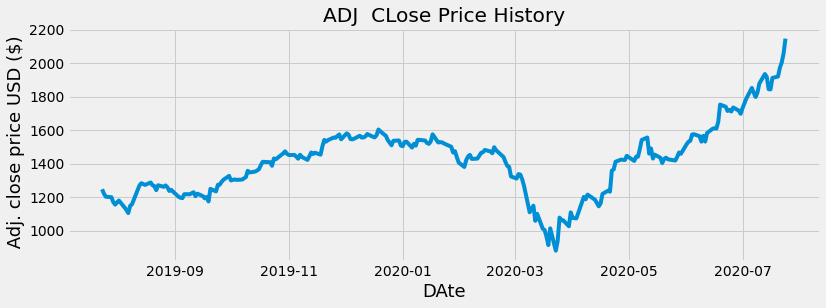

In [4]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df["Adj Close"], label ='ADj Close Price')
plt.title("ADJ  CLose Price History")
plt.xlabel('DAte', fontsize = 18)
plt.ylabel(' Adj. close price USD ($)', fontsize = 18)
plt.show()

In [7]:
# Prepare the data to calculate the rsi

# First, get the difference in price from the previous day
delta = df['Close'].diff(1)
delta

Date
2019-07-24          NaN
2019-07-25   -27.599976
2019-07-26   -17.699951
2019-07-29    -2.850098
2019-07-30   -30.049927
                ...    
2020-07-20     8.200073
2020-07-21    51.650024
2020-07-22    32.449951
2020-07-23    53.800049
2020-07-24    88.349854
Name: Close, Length: 245, dtype: float64

In [8]:
# to get rid of the inital Nan Valaue

delta= delta.dropna()
delta

Date
2019-07-25   -27.599976
2019-07-26   -17.699951
2019-07-29    -2.850098
2019-07-30   -30.049927
2019-07-31   -14.650024
                ...    
2020-07-20     8.200073
2020-07-21    51.650024
2020-07-22    32.449951
2020-07-23    53.800049
2020-07-24    88.349854
Name: Close, Length: 244, dtype: float64

In [9]:
# get the postive gain (up) and negative gain(down)

up = delta.copy()
down = delta.copy()

up[up<0] = 0 #values below 0 set as 0
down[down>0] = 0 # values greater than 0 set as 0

In [22]:
# time period considered for RSI = 14 days
period=14

# calc avg gain and loss over period 
avg_gain = up.rolling(window=period).mean()
avg_loss = abs(down.rolling(window=period).mean())

print(avg_gain)

Date
2019-07-25          NaN
2019-07-26          NaN
2019-07-29          NaN
2019-07-30          NaN
2019-07-31          NaN
                ...    
2020-07-20    25.800005
2020-07-21    27.096436
2020-07-22    27.789289
2020-07-23    29.664289
2020-07-24    31.410706
Name: Close, Length: 244, dtype: float64


In [23]:
# calc the RSI usind formula

#calculate the RS Relative strength
RS = avg_gain/avg_loss

#Using Fromula :
RSI = 100.0 - (100.0 / (1.0 + RS))
RSI

Date
2019-07-25          NaN
2019-07-26          NaN
2019-07-29          NaN
2019-07-30          NaN
2019-07-31          NaN
                ...    
2020-07-20    71.298856
2020-07-21    72.291569
2020-07-22    72.794461
2020-07-23    74.068128
2020-07-24    75.151662
Name: Close, Length: 244, dtype: float64

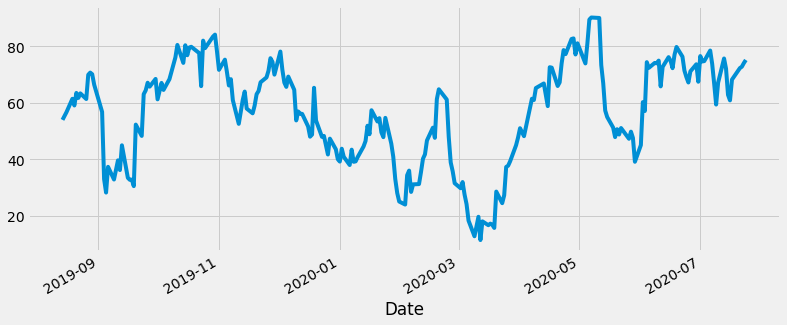

In [24]:
#plot RSI Graph
plt.figure(figsize=(12, 5))
RSI.plot()
plt.show()

In [25]:
# PErforming analysis based on RSI values

ana_df = pd.DataFrame()
ana_df['Adj Close'] = df['Adj Close']
ana_df['RSI'] = RSI
ana_df

,Adj Close,RSI
Date,,
2019-07-24,1247.546387,NaN
2019-07-25,1220.199707,NaN
2019-07-26,1202.662231,NaN
2019-07-29,1199.838257,NaN
2019-07-30,1170.064087,NaN
...,...,...
2020-07-20,1919.900024,71.298856
2020-07-21,1971.550049,72.291569
2020-07-22,2004.000000,72.794461


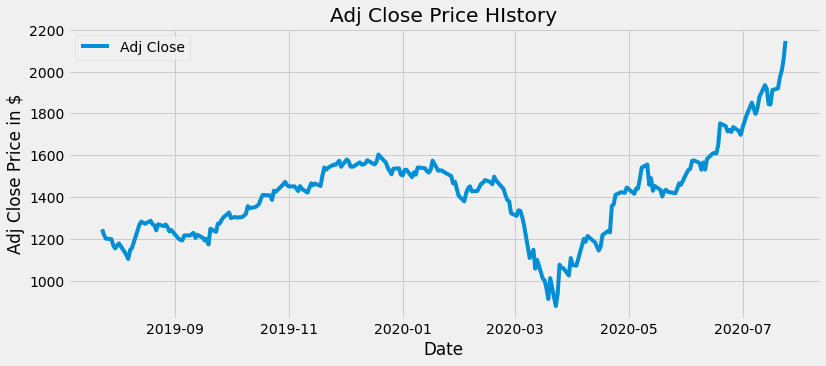

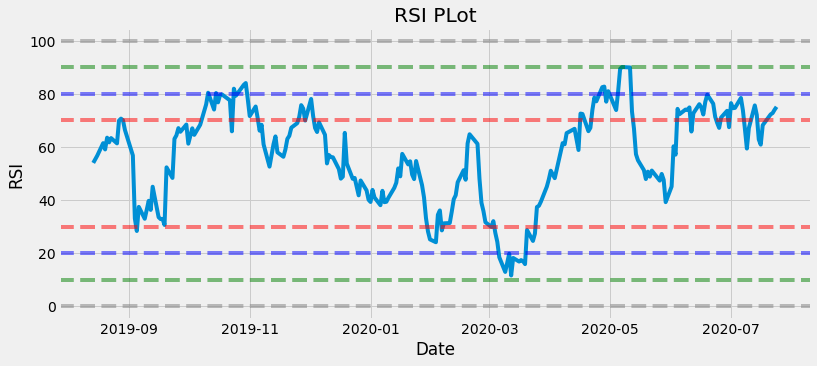

In [27]:
#Plotting the adjclose and the RSI together

plt.figure(figsize=(12,5))
plt.plot(ana_df.index, ana_df['Adj Close'])
plt.title('Adj Close Price HIstory')
plt.xlabel('Date')
plt.ylabel('Adj Close Price in $')
plt.legend(ana_df.columns.values, loc = 'upper left')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(ana_df.index, ana_df['RSI'])
plt.title('RSI PLot')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(0, linestyle = '--', alpha = 0.5, color= 'gray')
plt.axhline(10, linestyle = '--', alpha = 0.5, color= 'green')
plt.axhline(20, linestyle = '--', alpha = 0.5, color= 'blue')
plt.axhline(30, linestyle = '--', alpha = 0.5, color= 'red')
plt.axhline(70, linestyle = '--', alpha = 0.5, color= 'red')
plt.axhline(80, linestyle = '--', alpha = 0.5, color= 'blue')
plt.axhline(90, linestyle = '--', alpha = 0.5, color= 'green')
plt.axhline(100, linestyle = '--', alpha = 0.5, color= 'gray')

plt.show()
